{0: (14, 6), 1: (37, 17), 2: (83, 16), 3: (55, 1), 4: (30, 0), 5: (59, 9), 6: (19, 13), 7: (57, 14), 8: (8, 2), 9: (18, 1), 10: (47, 3), 11: (40, 1), 12: (66, 16), 13: (48, 2), 14: (65, 18), 15: (24, 8), 16: (6, 4), 17: (45, 4), 18: (58, 20), 19: (83, 6)}


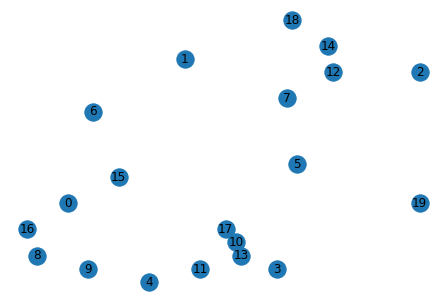

In [7]:
from ortools.sat.python import cp_model
import networkx as nx
from random import *

n = 20
#crear grafo
G = nx.Graph()
#agregar nodos
for i in range(n):
  G.add_node(i,pos=(randint(0,100),randint(0,20)))
#plotear grafo
pos = nx.get_node_attributes(G, 'pos')
print(pos)
nx.draw(G,pos,with_labels=True)

In [8]:
#crear CSP
model = cp_model.CpModel()
#variables
x = []
for i in range(n):
  x += [[model.NewBoolVar('x_'+str(i)+'_'+str(j)) for j in range(n)]]
#print(x)
t = [model.NewIntVar(0,n,'t_'+str(i)) for i in range(n)]

#restricciones
dist = lambda i,j : int(((pos[i][0] - pos[j][0])**2 + (pos[i][1] - pos[j][1])**2)**0.5)
#def dist(i,j):
  #return int(((pos[i][0] - pos[j][0])**2 + (pos[i][1] - pos[j][1])**2)**0.5)
#ingresa a cada ciudad 1 vez
for i in range(n):
  model.Add(sum(x[i]) == 1)
#salir de cada ciudad 1 vez
for j in range(n):
  model.Add(sum([x[i][j] for i in range(n)]) == 1)
#no se puede ir de una ciudad a sí misma
for i in range(n):
  model.Add(x[i][i] == 0)

#MTZ formulation
for i in range(1,n):
  for j in range(1,n):
    if i != j:
      model.Add(t[i] - t[j] + n * x[i][j] <= n - 1) # t_i + 1 + n*x_i_j <= t_j

#sumatoria de las distancias de los tramos elegidos debe ser minimizada
d = []
for i in range(n):
  d += [dist(i,j)*x[i][j] for j in range(n)]
#print(d)
model.Minimize(sum(d)) #COP 
#model.Add(sum(d) <= 200) #CSP

In [9]:
solver = cp_model.CpSolver()
status = solver.Solve(model)
print(solver.WallTime())
lista_arcos = []
if status == cp_model.OPTIMAL:
  for i in range(n):
    for j in range(n):
      print(solver.Value(x[i][j]),end=' ')
    print()
  print(solver.ObjectiveValue())
  print()
  for i in range(n):
    for j in range(n):
      if solver.Value(x[i][j]):
        print(i,j)
        lista_arcos += [(i,j)]

5.173423413
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
181.0

0 6
1 7
2 19
3 13
4 9
5 3
6 15
7 18
8 16
9 8
10 17
11 4
12 2
13 10
14 12
15 1
16 0
17 11
18 14
19 5
